In [1]:
import os
from pathlib import Path
from operator import itemgetter
import pickle
import pydicom
from time import time
import pandas

import matplotlib.pyplot as plt
import numpy as np

from catch_converter.parse_contours import parse_cvi42ws
from LazyLuna.Mini_LL import *
from LazyLuna.CATCH_utils import *
from LazyLuna.Tables  import *
from LazyLuna.Figures import *

In [2]:
# basepaths
bp        = '/Users/dietrichhadler/Desktop/Daten/CS_ESED_Cases'
bp_annos1 = '/Users/dietrichhadler/Desktop/Daten/CS_ESED_Cases/JGold'
bp_annos2 = '/Users/dietrichhadler/Desktop/Daten/CS_ESED_Cases/FCN'
bp_cases  = '/Users/dietrichhadler/Desktop/Daten/CS_ESED_Cases/Cases'
bp_imgs   = '/Users/dietrichhadler/Desktop/Daten/CS_ESED_Cases/Imgs'

In [ ]:
# get the paths of imgs and annotations via SeriesInstanceUIDs
imgsanno_paths = get_imgs_and_annotation_paths(bp_imgs, bp_annos)

print('Nr of path tuples: ', len(imgsanno_paths))
case_names = sorted([c[0] for c in imgsanno_paths])
from pprint import pprint
print('Existing Annotations: ', len(sorted([c[0] for c in imgsanno_paths if os.path.exists(c[1])])))
pprint(sorted([c[0] for c in imgsanno_paths if os.path.exists(c[1])]))

cases = []
sax_cine_view = SAX_CINE_View()
sax_cs_view   = SAX_CS_View()
for count, (imgp,annop) in enumerate(imgsanno_paths):
    print(count)
    print(os.path.basename(imgp), os.path.basename(annop))
    st = time()
    case = Case(imgp, annop, os.path.basename(imgp), os.path.basename(bp_annos))
    case = sax_cine_view.initialize_case(case)
    case = sax_cs_view  .initialize_case(case)
    case.store(bp_cases)
    cases.append(case)
    print('Case customization took: ', time()-st, 'Case: ', case.reader_name, case.case_name)
    print()

['Gold', 'FCN', 'Gold', 'FCN', 'FCN', 'Gold']
Index(['case', 'reader1', 'reader2', 'LVESV Gold', 'LVESV Gold',
       'LVESV difference', 'LVEDV Gold', 'LVEDV Gold', 'LVEDV difference',
       'RVESV Gold', 'RVESV Gold', 'RVESV difference', 'RVEDV Gold',
       'RVEDV Gold', 'RVEDV difference', 'LVSV Gold', 'LVSV Gold',
       'LVSV difference', 'LVEF Gold', 'LVEF Gold', 'LVEF difference',
       'RVSV Gold', 'RVSV Gold', 'RVSV difference', 'RVEF Gold', 'RVEF Gold',
       'RVEF difference', 'LVMYOMASS Gold', 'LVMYOMASS Gold',
       'LVMYOMASS difference', 'RVMYOMASS Gold', 'RVMYOMASS Gold',
       'RVMYOMASS difference', 'LVESP Gold', 'LVESP Gold', 'LVESP difference',
       'RVESP Gold', 'RVESP Gold', 'RVESP difference', 'LVEDP Gold',
       'LVEDP Gold', 'LVEDP difference', 'RVEDP Gold', 'RVEDP Gold',
       'RVEDP difference', 'LVEDP Gold', 'LVEDP Gold', 'LVEDP difference',
       'case', 'avg dice', 'avg dice cont by both', 'lv_endo avg dice',
       'lv_endo avg dice cont by bot

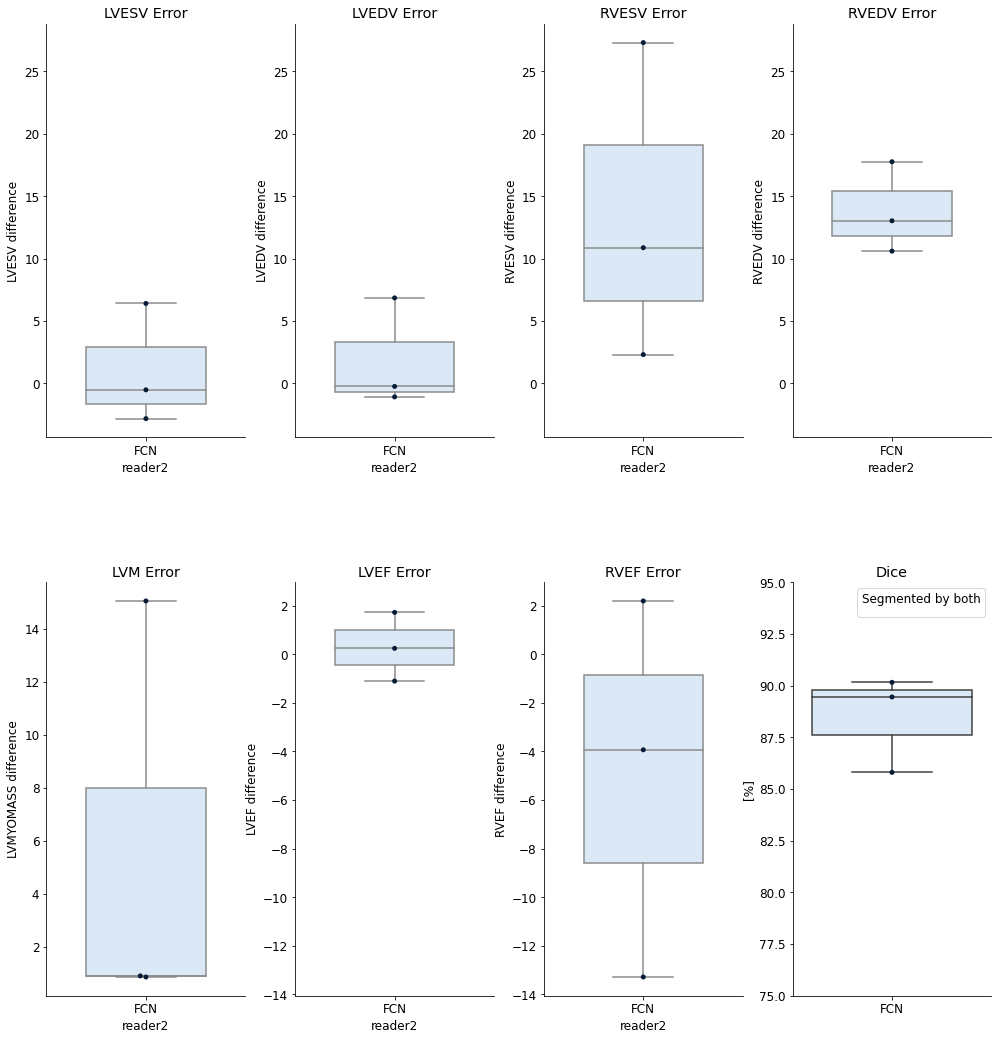

In [3]:
cases  = [pickle.load(open(os.path.join(bp_cases, p), 'rb')) for p in os.listdir(bp_cases)]
print([c.reader_name for c in cases])
cases1 = sorted([c for c in cases if c.reader_name=='Gold'], key=lambda c: c.case_name)
cases2 = sorted([c for c in cases if c.reader_name=='FCN'],  key=lambda c: c.case_name)

sax_cine_view = SAX_CINE_View()
sax_cs_view   = SAX_CS_View()

ccs = [Case_Comparison(sax_cs_view.customize_case(c1), sax_cs_view.customize_case(c2)) for c1,c2 in zip(cases1,cases2)]
#table = CC_ClinicalResultsTable()
#table.calculate(ccs, False)
#display(table.df)

SAX_candlelight_plot(ccs, '/Users/dietrichhadler/Desktop')

In [ ]:
view = SAX_CINE_View()
case = view.customize_case(case)
print(case.case_name)

print(case.type)
print(case.categories)
print(case.other_categories)
print(case.all_imgs_sop2filepath.keys())
for k in case.all_imgs_sop2filepath.keys():
    print(k, len(case.all_imgs_sop2filepath[k]), end=', ')
for cr in case.crs:
    print(cr.name, cr.get_cr(), end=', ')